In [1]:
from IPython.display import YouTubeVideo

# MSE 8900 / CHE 8450 - Multiscale Modeling

Rachel B. Getman, Sapna Sarupria, Ulf D. Schiller

Clemson University

## Module 3: Mesoscopic Methods

In this third part of the course, we will continue to expand our simulation toolbox and discuss "mesoscopic" methods that bridge between atomistic/molecular methods and continuum level descriptions.

### Overview (tentative)

1. Probabilistic Description of Particle Systems
2. Langevin Dynamics
2. Dissipative Particle Dynamics
3. Multi-Particle Collision Dyamics
4. Diffusion Equations / Fokker-Planck
5. Lattice-Boltzmann Methods
6. LB-MD Coupling
7. Bead-Spring Polymers
8. Non-equilibrium

### Motivation

#### What can we do so far?

### Complex Fluids

### Brownian Motion

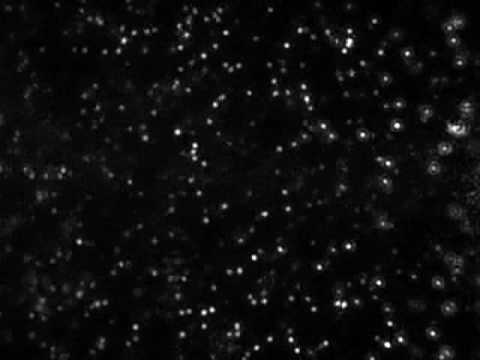

In [4]:
YouTubeVideo('cDcprgWiQEY')

### Lecture 3.1: Probabilistic description of particle systems

1. Thermodynamics
2. Statistical Mechanics
3. Liouville Formulation
4. Expectation Values

#### References
1. M. P. Allen and D. J. Tildesley, Computer Simulation of Liquids, 2nd edition, Oxford University Press, Oxford, 2017
2. J. M. Haile, Molecular Dynamics Simulation: Elementary Methods, Wiley, New York 1992
3. D. Frenkela and B. Smit, Understanding Molecular Simulation: From Algorithms to Applications, 2nd edition, Academic Press, San Diego 2002
4. D. C. Rapaport, The Art of Molecular Dynamics Simulation, 2nd edition, Cambridge University Press, Cambridge 2004

### Thermodynamics and Statistical Mechanics

* Thermodynamics: Relation between _macroscopic_ variables  
(axiomatic/phenomenological $\rightarrow$ thermodynamic potentials)

* Statistical Mechanics: Statistics of _microscopic_ states   
(ensembles $\rightarrow$ probability distributions)

### Thermodynamics

* Thermodynamic equilibrium: system is stationary, thermodynamic variables are time independent  
(does not mean that the system is in mechanical equilibrium)

* Answers to common question do not require detailed knowledge of microscopic degrees of freedom
(e.g. temperature, pressure, etc.)

* First Law of Thermodynamics
$$ \mathrm{d}E = \delta Q - \delta W $$

* Fundamental Form
$$\begin{aligned}
\mathrm{d}E &= T \mathrm{d}S - P \mathrm{d}V + \mu\mathrm{d}N\\
&=T\mathrm{d}S + \sum_i F_i \mathrm{d}X_i
\end{aligned}$$

* Does not say anything about fluctuations around the averages

* Needs equations of state as _input_

* Cannot _a-priori_ calculate response functions (specific heat, compressibility, susceptibility, etc.)

### Statistical Mechanics

* Probability distribution of microstates
* Postulate: All accessible microstates are equally probable (maximal ignorance)
$$\rho_\text{eq}(\Gamma) \propto \delta(\mathcal{H}(\Gamma)-E)$$
* Hamiltonian Dynamics
$$\begin{aligned}
\dot{q} &= \frac{\partial\mathcal{H}}{\partial p} & \dot{p} &= - \frac{\partial\mathcal{H}}{\partial q}
%\dot{A} = \{ A, \mathcal{H} \}
\end{aligned}$$
* Liouville Theorem
$$\mathrm{div}\,\dot{\Gamma} = 0$$
* Volume of phase space along trajectory is conserved
$$\frac{d}{dt}\rho(\Gamma(t),t) = \frac{\partial\rho}{\partial t} + \mathrm{div}\left(\dot{\Gamma} \rho\right) = 0$$
* Ergodicity
$$\lim_{T\rightarrow\infty} \frac{1}{T} \int_{0}^{T} {A}(t) \, \mathrm{d}t = \int_{\Omega} {A}(\Gamma) \, \mathrm{d}\mu(\Gamma)=\int_\Omega {A}(\Gamma) \rho(\Gamma) \, \mathrm{d}\Gamma$$


### Probability Distribution, Partition Function, Thermodynamic Potential
* microcanonical ensemble
* canonical ensemble
* grand-canonical ensemble

### Virial Theorem and Virial Expansion
* _Hypervirial relations_
$$\begin{aligned}
\left\langle A \frac{\partial\mathcal{H}}{\partial x_k} \right\rangle &= k_B T \left\langle \frac{\partial A}{\partial x_k} \right\rangle &
%\left\langle A \frac{\partial\mathcal{H}}{\partial p_k} \right\rangle &= k_B T \left\langle \frac{\partial A}{\partial p_k} \right\rangle
\end{aligned}$$
* _Generalized equipartition_
$$ \left\langle x_m \frac{\partial\mathcal{H}}{x_n} \right\rangle = \delta_{nm} k_B T$$
* Virial theorem
$$ \left\langle K \right\rangle = - \frac{1}{2} \sum_{i=k}^{N} \left\langle \vec{q}_k \vec{F}_k \right\rangle = \frac{3}{2}Nk_BT$$
* Virial expansion
$$\frac{P}{k_BT} = \rho + B_2(T) \rho^2 + B_3(T) \rho^3 + \dots$$

### Liouville Formalism
* We know the equation of motion for observables
$$\dot{A} = \{ A, \mathcal{H} \}$$
* Introduce a time evolution operator (Liouville operator)
$$\begin{align}
\dot{A} &= i \mathcal{L} A & \mathcal{L}A&=i\{ \mathcal{H}, A \}
\end{align}$$
* Formal solution
$$\begin{align}
A(t) &= \exp\left(i\mathcal{L}t\right) A(0) = U(t) A(0) & U(t) &= \exp\left(i\mathcal{L}t\right)
\end{align}$$

### Liouville Equation
* Liouville operator
$$i\mathcal{L} = \dot{q} \frac{\partial}{\partial q} + \dot{p} \frac{\partial}{\partial p}=\dot{\Gamma}\cdot\mathrm{div}$$
* $\mathcal{L}$ is a hermitian (self-adjoint) operator
* $U(t)=\exp\left(i\mathcal{L}t\right)$ is a unitary time-development operator
* Evolution of the phase space density: _Liouville's Equation_
$$\frac{\partial\rho}{\partial t} = - \{ \rho, \mathcal{H} \} = - i \mathcal{L} \rho$$
* Equilibrium: Stationary probability distribution
$$\mathcal{L} \rho(\Gamma) = 0$$

### Expectation Values
* Expectation value of a dynamical variable (cf. Heisenberg picture vs. Schr&ouml;dinger picture)
$$\begin{align}
\left\langle A \right\rangle &= \int A(\Gamma_t) \rho(\Gamma,0) \, \mathrm{d}\Gamma = \left( \rho(0), A(t) \right) \\
&= \int A(\Gamma_0) \rho(\Gamma,t) \, \mathrm{d}\Gamma = \left( \rho(t), A(0) \right) \\
&= \mathrm{tr}\left(\rho A\right)
\end{align}$$
* Unifies classical mechanics and quantum mechanics (density matrix formulation)
$$\left\langle A \right\rangle = \mathrm{tr}\left(\rho A\right)$$

### Reduced Density Distributions

* Canonical partition function
$$Z = Z_\text{ideal} Q$$
* Probability distribution
$$\rho_N(q,p) = \frac{1}{Z_\text{ideal}} \exp\left(-\beta\frac{p^2}{2m}\right) \frac{1}{Q} \exp\left(-\beta U(q)\right)$$
* Probability distribution in _configuration space_
$$\rho_N(q) = \frac{1}{Q} \exp\left(-\beta U(q)\right)$$
* _Reduced distribution function_ (m-particle distribution function)
$$f_m(q_1,\dots,q_m,p_1,\dots,p_m)=\frac{N!}{(N-m)!}\int \rho_N(q_1,\dots,q_N,p_1,\dots,p_N) \Pi_{i=m+1}^N \mathrm{d}q_i\mathrm{d}p_i$$
* One-particle and two-particle distribution functions in configuration space
$$\begin{align}
f_1(r) &= n = \frac{N}{V} & f_2(r_1,r_2) = n^2 g\left(|r_1-r_2|\right)
\end{align}$$

### Hydrodynamic Quantities
* local density
$$ n(\vec{r},t)=\int f_1(\vec{r},\vec{v},t) \, \mathrm{d}\vec{v}$$
* local velocity
$$ u(\vec{r},t)=\frac{1}{n(\vec{r},t)}\int \vec{v} \, f_1(\vec{r},\vec{v},t) \, \mathrm{d}\vec{v}$$
* in general
$$ A(r,t) = \int A(\vec{v}) \, f_1(\vec{r},\vec{v},t) \, \mathrm{d}\vec{v}$$

### BBGKY Hierarchy

* What is the equation of motion for the _conditional PDF_ $f_1(q,p,t\,|\,q_0,p_0,t_0)$?
* Limiting cases
$$\begin{align}
t&=t_0 & f_1 &\propto \delta(q-q_0)\delta(p-p_0) \\
t-t_0&\rightarrow\infty & f_1 &= \frac{N}{V} \left(\frac{\beta m}{2\pi}\right)^\frac{d}{2} \exp\left(-\beta \frac{p^2}{2m} \right)
\end{align}$$
* Behavior in between: no closed equation! (suggests that this is a hard problem...)
* _Bogoliubov–Born–Green–Kirkwood–Yvon Hierarchy_
$$\begin{align}
\frac{\partial f_m}{\partial t} - \{ \mathcal{H}_m, f_m \} = \sum_{i=1}^m \int \frac{\partial U_{i,m+1}}{\partial q_i} \frac{\partial f_{m+1}}{\partial p_i}\, \mathrm{d}q_{m+1}\mathrm{d}p_{m+1}
\end{align}$$
* One-particle distribution function ("precursor" to the Boltzmann equation)
$$\left[ \frac{\partial}{\partial t} + \frac{p_1}{m} \frac{\partial}{\partial q_1} + F_1 \frac{\partial}{\partial p_1} \right] f_1(q,p,t) = \int \frac{\partial U_{12}}{\partial q_1} \frac{\partial f_{2}}{\partial p_1}\, \mathrm{d}q_{2}\mathrm{d}p_{2}$$

### Static Properties

* Temperature ($f$: # of independent degrees of freedom)
$$k_B T = \frac{2\left\langle K \right\rangle}{f}$$
* Structure
$$\begin{aligned}
g(r)&= \frac{\left\langle N(r,\Delta r) \right\rangle}{\frac{1}{2} N \rho V(r,\Delta r)} \\%& N(r,\Delta r)&=\sum_{i}\sum_{j<i} \delta(r-r_{ij}) \Delta r\\
\left\langle A \right\rangle &= \left\langle \sum_i \sum_{j<i} a(r_{ij}) \right\rangle = 2\pi N \rho \int_0^\infty a(r) g(r) r^2 \mathrm{d}r
\end{aligned}$$
* Energy
$$\begin{aligned}
E &= \frac{3}{2} N k_B T + 2 \pi N \rho \int_0^\infty u(r) g(r) r^2 \mathrm{d}r
\end{aligned}$$
* Pressure
$$\begin{aligned}
P &= \rho k_B T + \frac{1}{3V} \left\langle \sum_{i<j} \vec{r}_{ij} \vec{F}_{ij} \right\rangle \\
  &= \rho k_B T - \frac{2}{3} \pi \rho^2 \int_0^\infty \left( r \frac{du}{dr}\right) g(r) r^2 \mathrm{d}r
\end{aligned}$$
* Structure Factor
$$\begin{aligned}
S(\vec{k})&=1+\rho\int g(\vec{r})\exp(-i\vec{k}\vec{r})\mathrm{d}\vec{r}\\
S(k)&=1+4\pi\rho\int_0^\infty\frac{sin(kr)}{kr}g(r)r^2\mathrm{d}r
\end{aligned}$$

### Fluctuations and Response Functions
* Constant-volume heat capacity
$$c_v = \frac{\partial E}{\partial T} = \frac{1}{Nk_BT^2}\left\langle \left( E - \langle E \rangle \right)^2\right\rangle$$
* Adiabatic compressibility
$$\begin{aligned}
\kappa_s&=-\frac{1}{V} \frac{\partial V}{\partial P} = \left[ \rho k_B T + \frac{2}{3} P - \frac{N}{\rho k_BT} \left\langle (\delta P)^2\right\rangle + \langle\theta\rangle \right]^{-1} &
\theta&=\frac{1}{9V}\sum_{i<j} r_{ij}^2 \frac{\partial^2 u}{\partial r_{ij}^2}
\end{aligned}$$
* Thermal pressure coefficient
$$\gamma_v=\frac{\partial P}{\partial T}=\rho k_B + \frac{1}{k_BT^2}\left\langle \delta U \delta P \right\rangle$$
* Other response functions from classical thermodynamic relations

### Dynamic Properties, Correlation Functions, Transport Coefficients
* Time correlation functions
$$C(t) = \lim_{T\rightarrow\infty}\frac{1}{T} \int_0^T B(t+t')A(t') \mathrm{d}t' = \left\langle B(t+t')A(t')\right\rangle$$
* Green-Kubo integral
$$\gamma = \int_0^\infty \left\langle \dot{A}(t) \dot{A}(0) \right\rangle \mathrm{d}t$$
* Einstein relation
$$2\gamma t = \left\langle \left( A(t) - A(0) \right)^2 \right\rangle$$
* Diffusion coefficient
$$\begin{aligned}
D&=\frac{1}{6N}\lim_{t\rightarrow\infty}\frac{d}{dt}\left\langle \sum_i \left[ \vec{r}_i(t)-\vec{r}_i(0)\right]^2\right\rangle \\
&= \frac{1}{3} \int_0^\infty \left\langle v(t) v(0) \right\rangle \mathrm{d}t
\end{aligned}$$
* Shear viscosity
$$\eta=\frac{V}{k_B T} \int_0^\infty \left\langle P_{xy}(t) P_{xy}(0) \right\rangle \mathrm{d}t$$

* Thermal conductivity
$$\begin{aligned}
k&=\lim_{t\rightarrow\infty}\frac{1}{6T^2Vt}\left\langle\sum_\alpha\left[\sum_i \left( r_{i,\alpha}(t)e_i(t)-r_{i,\alpha}(0)e_i(0)\right)\right]^2\right\rangle\\
&=\frac{V}{3T^2}\int_0^\infty \left\langle \vec{J}(t)\cdot\vec{J}(0) \right\rangle
\end{aligned}$$
* Heat flux
$$\vec{S} = \frac{1}{V} \left[\sum_i \left( e_i \vec{v}_i + \sum_{i<j} \vec{r}_{ij}(\vec{f}_{ij}\cdot\vec{v_i} \right) \right]$$

### Dynamic Structure
* van Hove correlation function
$$\begin{aligned}
G(\vec{r},t)&=\frac{1}{\rho}\left\langle \rho(\vec{r},t)\rho(0,0) \right\rangle \\
&=\frac{1}{N} \left\langle \sum_i \sum_j \delta\left(\vec{r}+\vec{r}_i(0)-\vec{r}_j(t)\right) \right\rangle \\
G(\vec{r},0) &= \delta(\vec{r}) + \rho g(\vec{r})
\end{aligned}$$
* Intermediate scattering function
$$I(\vec{k},t)=\int G(\vec{r},t) \exp(-i\vec{k}\vec{r}) \mathrm{d}\vec{r} = \frac{1}{N} \left\langle \rho(\vec{k},t)\rho(-\vec{k},0)\right\rangle$$
* Recall: Static structure factor
$$S(\vec{k}) = 1+\rho\int g(\vec{r})\exp(-i\vec{k}\vec{r})\mathrm{d}\vec{r}=I(\vec{k},0)$$
* Dynamic structure factor
$$S(\vec{k},\omega)=\frac{1}{2\pi}\int I(\vec{k},t)\exp(i\omega t) \mathrm{d} t$$
* This can be measured experimentally (neutron scattering)

### Class Activity

Use your own MD code or any MD package to carry out MD simulations of a box of Lennard-Jones particles in the NVT ensemble. Tag a single particle and analyze the following quantities for this particle. Consider both the time dependence and the expectation values.

* the displacement $\Delta r(t)=\left(\vec{r}(t)-\vec{r}(0)\right)$
* the velocity $\langle\vec{v}\rangle$
* the mean square displacement $\left\langle (\Delta r(t))^2\right\rangle$
* the mean square velocity $\left\langle (\vec{v}(t))^2 \right\rangle$
* the velocity autocorrelation $\left\langle \vec{v}(t)\vec{v}(0) \right\rangle$

Can you make sense of the results? What difficulties did you encounter when calculating these observables? What parameters would affect the result? Discuss statistical errors. Discuss the physical interpretation of your results.

### References

1. M. P. Allen and D. J. Tildesley, Computer Simulation of Liquids, 2nd edition, Oxford University Press, Oxford, 2017
2. J. M. Haile, Molecular Dynamics Simulation: Elementary Methods, Wiley, New York 1992
3. D. Frenkela and B. Smit, Understanding Molecular Simulation: From Algorithms to Applications, 2nd edition, Academic Press, San Diego 2002
4. D. C. Rapaport, The Art of Molecular Dynamics Simulation, 2nd edition, Cambridge University Press, Cambridge 2004